In [6]:
# Numpy library to use matrices
import numpy as np

# Load display library for jupyter notebook
import matplotlib
from matplotlib import pyplot as plt


In [7]:
# We'll continue onwards with our canvas function
N = 100

def show_canvas(canvas, title=""):
    # Similar to doing cv2.imshow, but in this environment
    plt.figure()
    plt.imshow(canvas, cmap="gray", norm=matplotlib.colors.NoNorm()) 
    plt.title(title)
    
def reset_canvas(size):
    return np.ones((size,size))
    


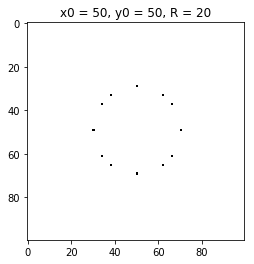

In [12]:
# Not-so-good way
x0 = 50
y0 = 50
R = 20
canvas = reset_canvas(N)
for x in range(-R, R + 1):
    for y in range(-R, R + 1):
        if int(np.isclose(x**2 + y**2 - R**2)) == 0:
            canvas[(N - 1) - (y + y0), x + x0] = 0
show_canvas(canvas, "x0 = {}, y0 = {}, R = {}".format(x0, y0, R))

In [13]:
# Draw all eight combinations (moved with origin)
def draw8(canvas, x, y, x0, y0):
    # The original pixel
    canvas[(N - 1) - (y + y0), (x + x0)] = 0
    # The other seven
    canvas[(N - 1) - (y + y0), (-x + x0)] = 0
    canvas[(N - 1) - (-y + y0), (x + x0)] = 0
    canvas[(N - 1) - (-y + y0), (-x + x0)] = 0
    canvas[(N - 1) - (x + y0), (y + x0)] = 0
    canvas[(N - 1) - (x + y0), (-y + x0)] = 0
    canvas[(N - 1) - (-x + y0), (y + x0)] = 0
    canvas[(N - 1) - (-x + y0), (-y + x0)] = 0
    return canvas

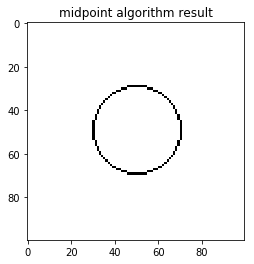

In [17]:
# Midpoint algorithm
x0 = 50
y0 = 50
R = 20
canvas = reset_canvas(N)
# init
d = 5 - 4 * R
x_s = 0
x_e = int(np.round(1/np.sqrt(2) * R))
y = R

# TODO: Implement
for x in range(x_s, x_e + 1):
    draw8(canvas, x, y, x0, y0)
    if d < 0:
        d += 8 * x + 12
        y = y
    else:
        d += 8 * x - 8 * y + 20
        y = y - 1
    

show_canvas(canvas, "midpoint algorithm result")

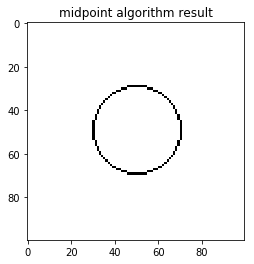

In [9]:
# Another implementation of the Midpoint algorithm not shown in class
x0 = 50
y0 = 50
R = 20
canvas = reset_canvas(N)
# init
d = 5 - 4 * R
x_s = 0
x_e = int(np.round(1/np.sqrt(2) * R))
y = R
for x in range(x_s, x_e + 1):
    canvas = draw8(canvas, x, y, x0, y0)
    if d < 0:
        # midpoint in circle, choose E
        delta = 8 * x + 12
        y = y
    else:
        # midpoint outside circle, choose SE
        delta = 8 * x - 8 * y + 20
        y = y - 1
    d += delta
show_canvas(canvas, "midpoint algorithm result")

In [ ]:
# Looks about right!